In [1]:
# Import the Required LIbraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Load the Dataset

file_df = pd.read_csv("bollywood.csv")

In [3]:
# View the First Five Rows

file_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [4]:
# Rename the Release date column

file_df = file_df.rename(columns={"Release Date":"ReleaseDate"})

In [5]:
# Determine the Number of rows present in the dataset and the metadata

file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   ReleaseDate          149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [6]:
# Determine the number of movies that got released in each "Genre" using value_counts()

file_df["Genre"].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [7]:
pd.crosstab(file_df["Genre"], file_df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### Observation:

* All the movies have thier highest releases during the Normal Season


In [9]:
# Extract a new Column "Month" from "ReleaseDate" column

file_df["Months"] = file_df["ReleaseDate"].str.split("-").str[1]

In [10]:
# Check out the first five rows

file_df.head()

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Months
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul


In [11]:
# Determine the month of the year with max number of movies release

file_df["Months"].value_counts(ascending= False)

Jan    20
Mar    19
May    18
Jul    16
Feb    16
Apr    11
Sep    10
Jun    10
Nov    10
Oct     9
Aug     8
Dec     2
Name: Months, dtype: int64

### Observation:

* January is the month with the maximum number of movie release with a total of 20.

In [12]:
# Month with the highest release of Highly Budgeted Movies.... Question 5

file_df.Months[file_df["Budget"] >= 25].value_counts()[:1]


Feb    9
Name: Months, dtype: int64

### Observation:

* February has the highest release of movies release with budget greater than 25.

### Answer to Question 6 starts here

In [13]:
# create a column of ROI

file_df["ROI"] = (file_df["BoxOfficeCollection"] - file_df["Budget"])/ file_df["Budget"]

In [14]:
file_df.head(7)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Months,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.400000
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84,May,4.000000
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373,Sep,-0.180000


In [15]:
# Question 6

most_ROI = file_df[["MovieName", "ROI"]].sort_values("ROI", ascending= False)[0:10]

In [16]:
most_ROI

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [80]:
# Print movies with the Highest ROI!

print("The following are the movies with the highest ROI: ")
for ele in most_ROI['MovieName']:
    print(ele)

The following are the movies with the highest ROI: 
Aashiqui 2
PK
Grand Masti
The Lunchbox
Fukrey
Mary Kom
Shahid
Humpty Sharma Ki Dulhania
Bhaag Milkha Bhaag
Chennai Express


In [17]:
file_df.groupby("ReleaseTime").mean()['ROI']


ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

### Observation:

* The movies released on Long Weekends have a greater ROI than the others

# The Visualization Solutions

## Answer to Question 8

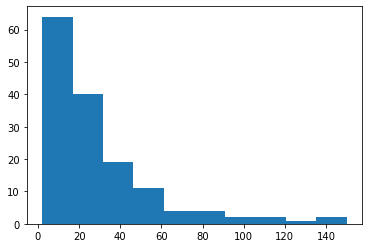

In [18]:
# Histogram depicting the Distribution

plt.hist(file_df['Budget'])
plt.show()

### Observation:
* The plot depicted is positively skewed.
* The most movies (with highest frequencies) are low budgeted movies.

## Answer to Question 9

In [20]:
# An Attempt to use the Histogram Density Plot

file_df.Genre.unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [21]:
comedy_df = file_df[file_df.Genre == 'Comedy']
drama_df = file_df[file_df.Genre == ' Drama ']

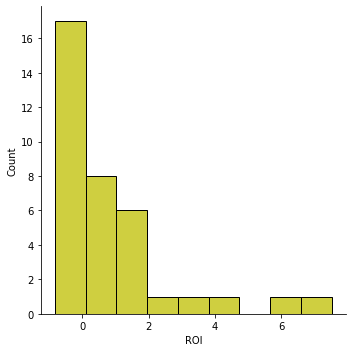

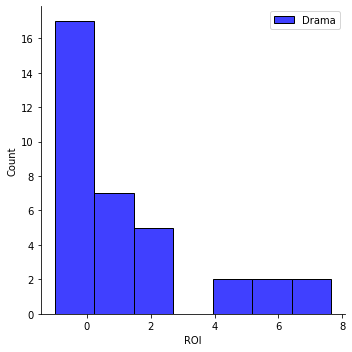

In [81]:
# Plot the density Plots of Comedy and Drama Genres

sn.displot(file_df[file_df.Genre == 'Comedy'].ROI, color= 'y', label = 'Comedy')
sn.displot(file_df[file_df.Genre == ' Drama '].ROI, color= 'b', label = 'Drama')
plt.legend()
plt.show()

### Observation:

* The ROI of Drama genre is generally greater than that of Comedy

## Answer to Question 10

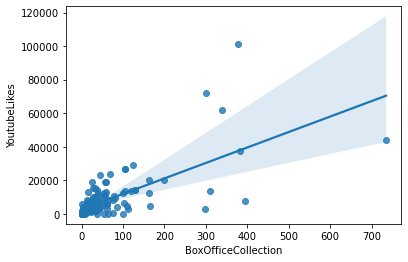

In [55]:
# Determining the correlation between Box Office Collection and Youtube Likes

sn.regplot(x = file_df["BoxOfficeCollection"], y= file_df['YoutubeLikes'])
plt.show()

### Observation:

* Yes, There is a correlation between Box Office Collection and Youtube Likes
* The Correlation is positive

## Answer to Question 11

In [56]:
# View the first five rows

file_df.head()

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Months,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.200000
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.600000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.950000
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.400000


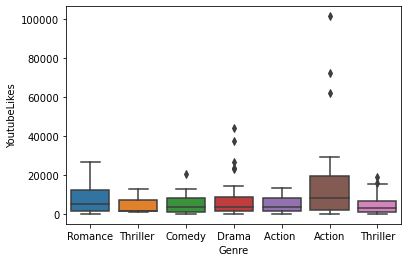

In [71]:
# make a BoxPlot comparing the Genres

sn.boxplot(x = 'Genre', y = 'YoutubeLikes', data= file_df )
plt.show()

### Observations: 

* As observed, the genre 'Action' has the highest Youtube Likes.
* It's median is greater than any other one

## Answer to Question 12

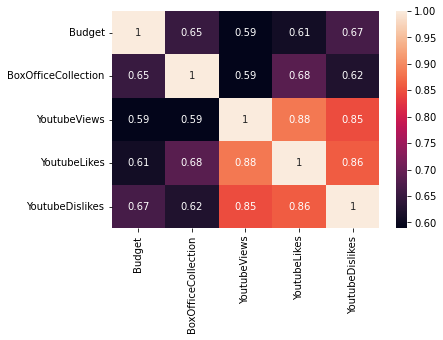

In [75]:
# Create a HeatMap to compare the correlations of the data
# Create a list of column names to be compared for correlation

get_column_corr = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']

sn.heatmap(file_df[get_column_corr].corr(), annot= True)
plt.show()

### Observation:

* YoutubeLikes and YoutubeViews are the two most correlated with correlation value of 0.88